In [1]:
## import thư viện
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/anh1100001/Test-1/main/loans_full_schema.csv')

In [3]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


# 1. •	Describe the dataset and any issues with it

In [4]:
# kiểm tra dữ liêu bao nhiêu hàng, cột
df.shape

(10000, 55)

Dữ liệu với 10000 hàng 55 cột

In [5]:
#kiểm tra định dạng các cột
df.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

In [6]:
#Kiểm tra các giá trị NULL
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [7]:
df.describe(include="all")

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9167,9183.000000,10000,10000,1.000000e+04,10000,9976.000000,1.495000e+03,1455,1495.000000,...,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,4741,NaN,50,3,NaN,3,NaN,NaN,3,NaN,...,32,3,6,2,2,NaN,NaN,NaN,NaN,NaN
top,manager,NaN,CA,MORTGAGE,NaN,Source Verified,NaN,NaN,Not Verified,NaN,...,B1,Mar-2018,Current,whole,Cash,NaN,NaN,NaN,NaN,NaN
freq,218,NaN,1330,4789,NaN,4116,NaN,NaN,611,NaN,...,647,3617,9375,8206,9284,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.930306,NaN,NaN,7.922215e+04,NaN,19.308192,1.279146e+05,NaN,19.979304,...,NaN,NaN,NaN,NaN,NaN,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,NaN,3.703734,NaN,NaN,6.473429e+04,NaN,15.004851,7.016838e+04,NaN,8.054781,...,NaN,NaN,NaN,NaN,NaN,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,NaN,0.000000,NaN,NaN,0.000000e+00,NaN,0.000000,1.920000e+04,NaN,0.320000,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,NaN,NaN,4.500000e+04,NaN,11.057500,8.683350e+04,NaN,14.160000,...,NaN,NaN,NaN,NaN,NaN,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,NaN,6.000000,NaN,NaN,6.500000e+04,NaN,17.570000,1.130000e+05,NaN,19.720000,...,NaN,NaN,NaN,NaN,NaN,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,NaN,10.000000,NaN,NaN,9.500000e+04,NaN,25.002500,1.515455e+05,NaN,25.500000,...,NaN,NaN,NaN,NaN,NaN,20690.182500,2616.005000,1694.555000,825.420000,0.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [9]:
## thay thế các giá trị NA bằng Other or mean
df['emp_title'].fillna(value='Other', inplace=True)
df['verification_income_joint'].fillna(value='Other', inplace=True)
df = df.fillna(df.mean())

In [10]:
df.isnull().sum()

emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
annual_income_joint                 0
verification_income_joint           0
debt_to_income_joint                0
delinq_2y                           0
months_since_last_delinq            0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
months_since_90d_late               0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfac

In [11]:
df.describe(include="all")

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,10000,10000.000000,10000,10000,1.000000e+04,10000,10000.000000,1.000000e+04,10000,10000.000000,...,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,4742,NaN,50,3,NaN,3,NaN,NaN,4,NaN,...,32,3,6,2,2,NaN,NaN,NaN,NaN,NaN
top,Other,NaN,CA,MORTGAGE,NaN,Source Verified,NaN,NaN,Other,NaN,...,B1,Mar-2018,Current,whole,Cash,NaN,NaN,NaN,NaN,NaN
freq,833,NaN,1330,4789,NaN,4116,NaN,NaN,8545,NaN,...,647,3617,9375,8206,9284,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.930306,NaN,NaN,7.922215e+04,NaN,19.308192,1.279146e+05,NaN,19.979304,...,NaN,NaN,NaN,NaN,NaN,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,NaN,3.549197,NaN,NaN,6.473429e+04,NaN,14.986833,2.712304e+04,NaN,3.113514,...,NaN,NaN,NaN,NaN,NaN,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,NaN,0.000000,NaN,NaN,0.000000e+00,NaN,0.000000,1.920000e+04,NaN,0.320000,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,3.000000,NaN,NaN,4.500000e+04,NaN,11.067500,1.279146e+05,NaN,19.979304,...,NaN,NaN,NaN,NaN,NaN,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,NaN,5.930306,NaN,NaN,6.500000e+04,NaN,17.600000,1.279146e+05,NaN,19.979304,...,NaN,NaN,NaN,NaN,NaN,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,NaN,10.000000,NaN,NaN,9.500000e+04,NaN,24.990000,1.279146e+05,NaN,19.979304,...,NaN,NaN,NaN,NaN,NaN,20690.182500,2616.005000,1694.555000,825.420000,0.000000


=>>Nhận xét dữ liệu:

-Dữ liệu có 10000 dòng, 55 thuộc tính có nhiều biến chứa giá trị NA : emp_title, emp_length, debt_to_income, annual_income_joint, verification_income_joint,   debt_to_income_joint,  months_since_last_delinq, months_since_90d_late, months_since_last_credit_inquiry, num_accounts_120d_past_due.

-Có một số biến bị thiếu dữ liệu sẽ ảnh hưởng tới quá trình phân tích nên ta sẽ xử lý dữ liệu để đảm bảo độ chính xác

# Visualizations:

In [12]:
summary_by_state = df.groupby(["state"], as_index=False)\
    ["loan_amount"]\
    .agg([np.size, np.sum]).reset_index().rename(columns={'size':'no_borrowers','sum':'total_loan_amount'})

In [13]:
summary_by_state.sort_values('no_borrowers', ascending=False, inplace=True, ignore_index=True)

In [14]:
summary_by_state['Percentage'] = summary_by_state['no_borrowers']/summary_by_state['no_borrowers'].sum()*100

In [15]:
summary_by_state['Cummulate']  = summary_by_state['Percentage'].cumsum()

In [16]:
summary_by_state

,state,no_borrowers,total_loan_amount,Percentage,Cummulate
0,CA,1330,22073700,13.30,13.30
1,TX,806,13755275,8.06,21.36
2,NY,793,12589650,7.93,29.29
3,FL,732,11203675,7.32,36.61
4,IL,382,6776600,3.82,40.43
5,OH,338,5434125,3.38,43.81
6,NJ,338,5665850,3.38,47.19
7,GA,334,5545300,3.34,50.53
8,NC,299,4809225,2.99,53.52
9,PA,298,4665825,2.98,56.50


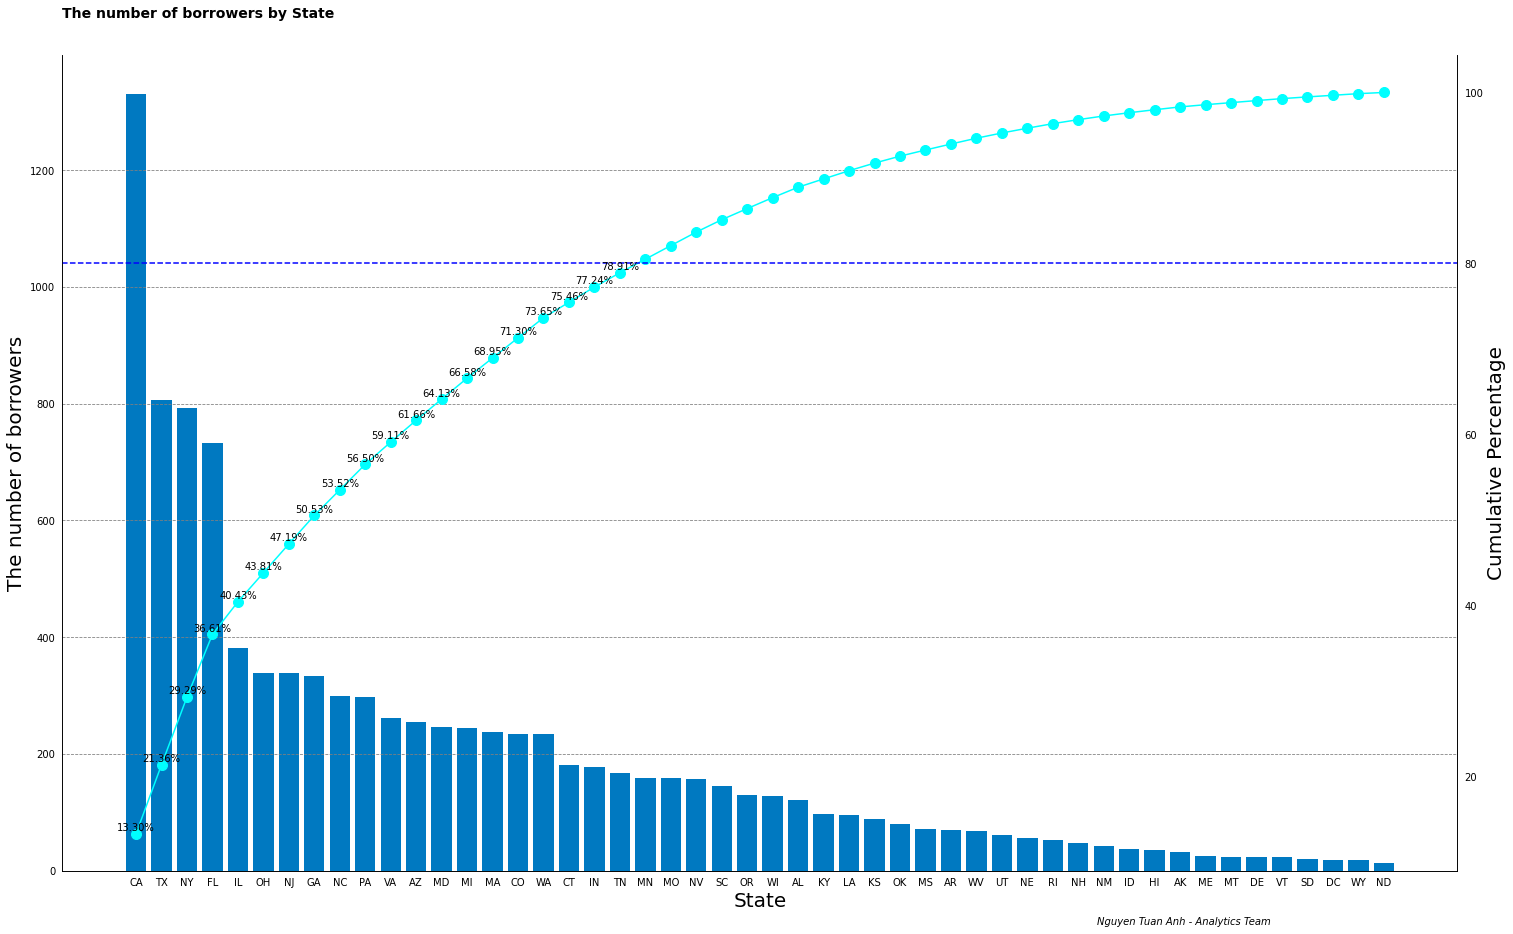

In [18]:
# Set figure and axis
fig, ax1 = plt.subplots(figsize=(25,15))
xs = summary_by_state['state']
ys = summary_by_state['no_borrowers']
yl = summary_by_state['Cummulate']

# Plot bars
ax1.bar(xs, ys, color = '#0079c1')
"""
for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        ax1.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
"""
#ax1.set_title("The number of borrowers by State", fontsize = 20, color = 'blue')
ax1.set_xlabel("State", fontsize = 20)
ax1.set_ylabel("The number of borrowers", fontsize = 20)

# Second y axis (i.e. cumulative percentage)
ax2 = ax1.twinx()
ax2.plot(xs,yl, color="#00ffff", marker="o", ms=10)

ax2.axhline(80, color="blue", linestyle="--") # Tạo đường 80%

#annotate for line
for x,y in zip(xs,yl):
    if y > 80:
        break
    else:
        label = "{:.2f}".format(y) + '%'

        ax2.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,3), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
        
ax1.yaxis.grid(color='gray', linestyle='dashed')
ax1.tick_params(left=False, bottom=False)
ax2.tick_params(right=False, bottom=False) 

ax2.set_ylabel("Cumulative Percentage", fontsize = 20)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False) 

plt.suptitle('The number of borrowers by State', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 0.925)
plt.text(0.7, 0.075, "Nguyen Tuan Anh - Analytics Team", style='italic',transform=plt.gcf().transFigure)
plt.show()

### Nhận xét: CA là bang có số lượng người vay lớn nhất, tiếp đến là TX, NY, FL, IL Cũng có số lượng người vay lớn hơn so với các bang còn lại, riêng 5 bang này đã chiếm hơn 40% tổng số lượng vay.

In [19]:
summary_by_state['proportion'] = summary_by_state['total_loan_amount']/summary_by_state['total_loan_amount'].sum()*100

In [20]:
top5_state = summary_by_state.loc[:, ['state','total_loan_amount','proportion']].head(5).copy()

In [21]:
top5_state['total_loan_amount'] = top5_state['total_loan_amount']/1000

In [22]:
top5_state.sort_values('total_loan_amount', ascending=True, inplace=True, ignore_index=True)

In [23]:
top5_state

,state,total_loan_amount,proportion
0,IL,6776.600,4.141689
1,FL,11203.675,6.847407
2,NY,12589.650,7.694481
3,TX,13755.275,8.406882
4,CA,22073.700,13.490896


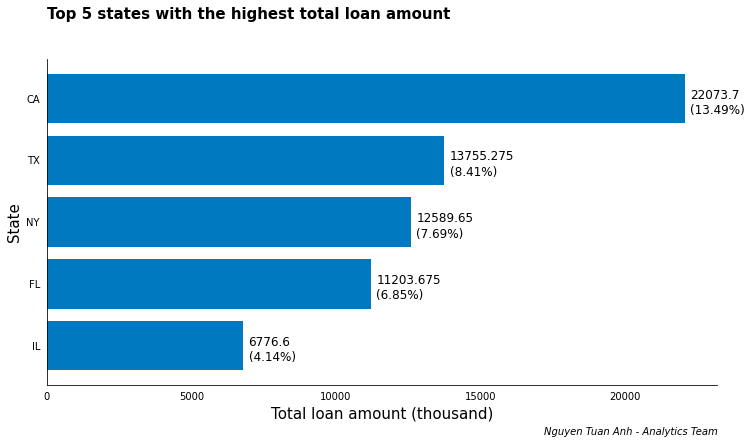

In [25]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh('state', 'total_loan_amount', data=top5_state, color='#0079c1')

# Show dữ liệu 
    # hoặc có thể dùng lệnh sau nếu không cần show %: ax.bar_label(bar1, size=10) # thêm option fmt='%.1f' nếu muốn format số)
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top5_state.total_loan_amount[i], xy=(p.get_width()+200, p.get_y()+p.get_height()/2)) # số 200 ở đây tùy scale của chart mà ta tinh chỉnh để số liệu tách ra xa khỏi bar cho đẹp
    t2 = ax.annotate('('+str(top5_state.proportion.round(2)[i])+'%)', xy=(p.get_width()+200, p.get_y()+0.15))
    t1.set(size=12)
    t2.set(size=12)
    i+=1
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('Top 5 states with the highest total loan amount', fontweight='bold', size=15, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('Total loan amount (thousand)', size=15)
plt.ylabel('State', size=15)
plt.text(0.7, 0.01, "Nguyen Tuan Anh - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

=>> Tổng lượng tiền vay của 5 bang CA, TX, NY, FL, IL là lớn nhất trong các bang

# Loan purpose

In [26]:
summary_by_loan_purpose = df.groupby(["loan_purpose"], as_index=False)\
    ["loan_amount"]\
    .agg([np.size, np.sum]).reset_index().rename(columns={'size':'no_borrowers','sum':'total_loan_amount'})

In [27]:
summary_by_loan_purpose.sort_values('no_borrowers', ascending=True, inplace=True, ignore_index=True)

summary_by_loan_purpose

,loan_purpose,no_borrowers,total_loan_amount
0,renewable_energy,10,140000
1,vacation,62,421900
2,moving,69,682675
3,small_business,125,2477500
4,car,131,1361250
5,house,151,2689275
6,medical,162,1836800
7,major_purchase,303,4752425
8,home_improvement,680,11719225
9,other,914,11819025


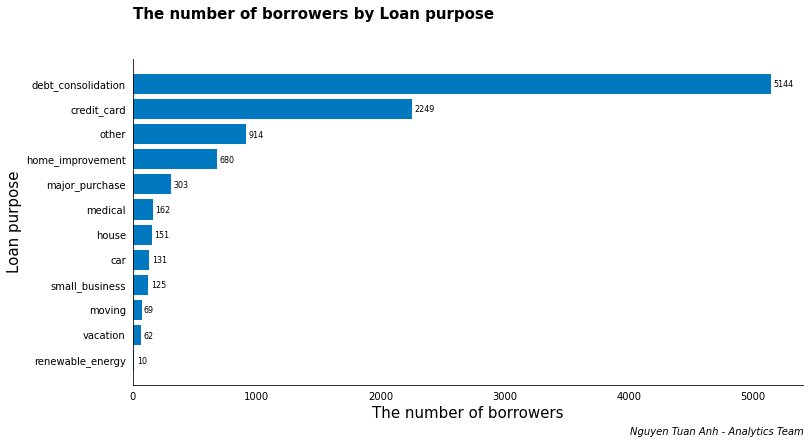

In [28]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh('loan_purpose', 'no_borrowers', data=summary_by_loan_purpose, color='#0079c1')

# Show dữ liệu 
    # hoặc có thể dùng lệnh sau nếu không cần show %: ax.bar_label(bar1, size=10) # thêm option fmt='%.1f' nếu muốn format số)
i = 0
for p in bar1.patches:
    t1 = ax.annotate(summary_by_loan_purpose.no_borrowers[i], xy=(p.get_width()+20, p.get_y()+p.get_height()/3)) # số 200 ở đây tùy scale của chart mà ta tinh chỉnh để số liệu tách ra xa khỏi bar cho đẹp
    t1.set(size=8)
    i+=1
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('The number of borrowers by Loan purpose', fontweight='bold', size=15, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=15, loc='left')
plt.xlabel('The number of borrowers', size=15)
plt.ylabel('Loan purpose', size=15)
plt.text(0.7, 0.01, "Nguyen Tuan Anh - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

=> Đa phần các khoản vay với mục đích debt_consolidation(khoản vay hợp nhất), tiếp theo là credit_card, other, home_improvement, major_puchase

## Annual income 

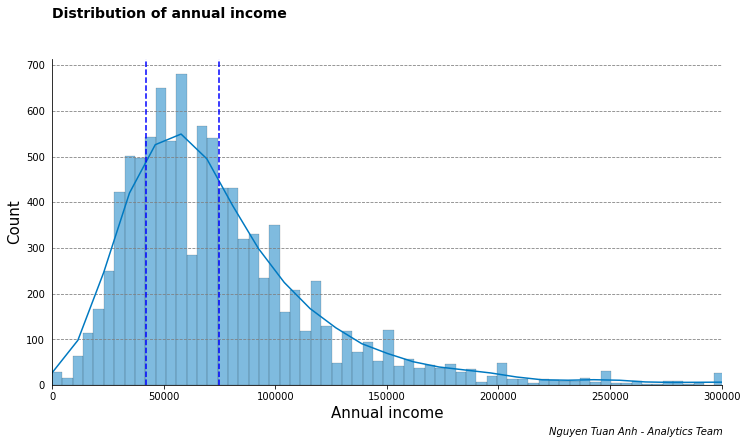

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))

ax=sns.histplot(data=df, x=df.annual_income, kde=True, color='#0079c1')
ax.axvline(42000, color="blue", linestyle="--")
ax.axvline(75000, color="blue", linestyle="--")
plt.xlim(0, 300000)

ax.yaxis.grid(color='gray', linestyle='dashed')
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False) 

# thêm title, label các trục và source:
plt.suptitle('Distribution of annual income', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=15, loc='left')
plt.xlabel('Annual income', size=15)
plt.ylabel('Count', size=15)
plt.text(0.7, 0.01, "Nguyen Tuan Anh - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

==> Thu nhập hàng năm của khách hàng vay tập chung chủ yếu từ khoảng 40000 đến 70000

## loan status and debt to income

In [30]:
df1 = df.loc[:, ['loan_status','debt_to_income']].copy()

In [31]:
median_list = df1.groupby('loan_status', as_index=False)['debt_to_income'].median().rename(columns={'debt_to_income':'median'})

In [32]:
median_list.sort_values('median', ascending=True, inplace=True, ignore_index=True)

In [33]:
median_list

,loan_status,median
0,Late (31-120 days),15.81
1,Fully Paid,16.17
2,Late (16-30 days),17.04
3,Current,17.67
4,In Grace Period,17.80
5,Charged Off,20.61


In [34]:
df2 = pd.merge(df1,median_list,on='loan_status',how='left')

In [35]:
df2.sort_values('median', ascending=True, inplace=True, ignore_index=True)

In [39]:
df2

,loan_status,debt_to_income,median
0,Late (31-120 days),3.54,15.81
1,Late (31-120 days),4.35,15.81
2,Late (31-120 days),31.08,15.81
3,Late (31-120 days),30.00,15.81
4,Late (31-120 days),2.98,15.81
...,...,...,...
9995,Charged Off,20.61,20.61
9996,Charged Off,29.31,20.61
9997,Charged Off,20.66,20.61
9998,Charged Off,34.72,20.61


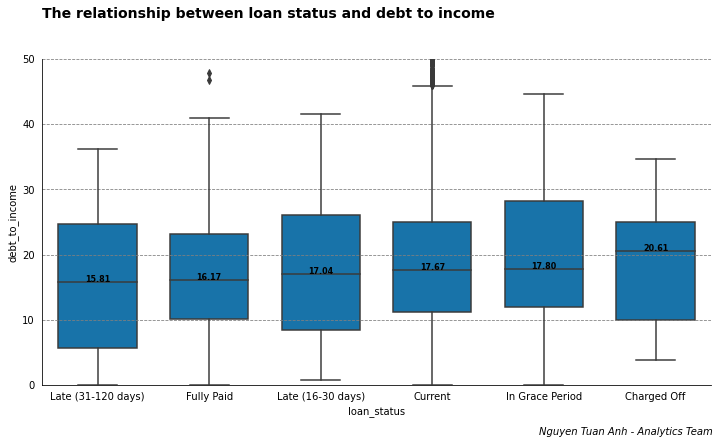

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
box_width=0.7

ax=sns.boxplot(x=df2.loan_status, y=df2.debt_to_income, data=df2, width=box_width, color='#0079c1')

# show medians
i = 0
for i in range(median_list.shape[0]):
    x = i #+box_width/2*1.05
    y = median_list.loc[i,['median']]
    ax.annotate('%.2f' %median_list.loc[i,['median']],
                  (x,y),
                  #color='white',
                  weight='semibold',
                ha='center',
                  size=8
                 )

# Add x, y gridlines
ax.yaxis.grid(color='gray', linestyle='dashed')

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('The relationship between loan status and debt to income', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)

plt.text(0.7, 0.01, "Nguyen Tuan Anh - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.ylim(0, 50)
plt.show()

=> Những khoản vay trễ 31- 120 ngày lại có tỉ lệ nợ trên tổng thu nhập là thấp nhất (15,81) thấp hơn cả những khoản vay đã trả nợ thành công.

Những khoản vay mất khả năng chi trả (charged off) là những khoản vay có tỉ lệ nợ trên tổng thu nhập cao nhất (20,61)

### loan grade and interest rate

In [41]:
df_grade = df.loc[:, ['grade','interest_rate']].copy()

In [42]:
df_grade.sort_values('grade', ascending=True, inplace=True, ignore_index=True)

In [43]:
df_grade

,grade,interest_rate
0,A,6.72
1,A,7.34
2,A,6.07
3,A,7.34
4,A,7.34
...,...,...
9995,G,30.79
9996,G,30.79
9997,G,30.79
9998,G,30.79


In [44]:
median_list1 = df_grade.groupby('grade')['interest_rate'].median()

In [45]:
median_list1

grade
A     6.72
B    10.42
C    14.07
D    19.03
E    24.85
F    28.72
G    30.79
Name: interest_rate, dtype: float64

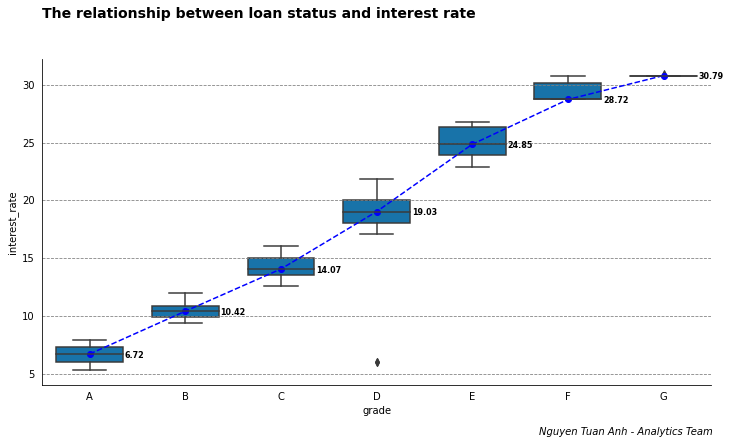

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))

box_width=0.7
ax=sns.boxplot(x=df_grade.grade, y=df_grade.interest_rate, data=df_grade, width=box_width, color='#0079c1')
ax.plot(range(len(median_list1)), median_list1, 'bo--', label= "versicolor")

# show medians
i = 0
for i in range(len(median_list1)):
    x = i+box_width/2*1.05
    y = median_list1[i]
    ax.annotate('%.2f' %median_list1[i],
                  (x,y-0.3),
                  #color='white',
                  weight='semibold',
                  size=8
                 )

# Add x, y gridlines
ax.yaxis.grid(color='gray', linestyle='dashed')

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('The relationship between loan status and interest rate', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)

plt.text(0.7, 0.01, "Nguyen Tuan Anh - Analytics Team", style='italic',transform=plt.gcf().transFigure)


plt.show()

=> Người vay có thứ hạng đánh giá càng thấp thì mức lãi suất phải chịu càng cao và ngược lại những người vay có thứ hạng đánh giá càng cao sẽ được hưởng mức lãi suất càng thấp.

# Create a model to predict interest rate

In [48]:
##import thu vien
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

### Tìm mối tương quan giữa biến interest_rate với một số biến khác

In [49]:
data = df.loc[:,['interest_rate','loan_amount','term','grade','sub_grade','annual_income','homeownership','verified_income','debt_to_income']].copy()

In [50]:
data

,interest_rate,loan_amount,term,grade,sub_grade,annual_income,homeownership,verified_income,debt_to_income
0,14.07,28000,60,C,C3,90000.0,MORTGAGE,Verified,18.01
1,12.61,5000,36,C,C1,40000.0,RENT,Not Verified,5.04
2,17.09,2000,36,D,D1,40000.0,RENT,Source Verified,21.15
3,6.72,21600,36,A,A3,30000.0,RENT,Not Verified,10.16
4,14.07,23000,36,C,C3,35000.0,RENT,Verified,57.96
...,...,...,...,...,...,...,...,...,...
9995,7.35,24000,36,A,A4,108000.0,RENT,Source Verified,22.28
9996,19.03,10000,36,D,D3,121000.0,MORTGAGE,Verified,32.38
9997,23.88,30000,36,E,E2,67000.0,MORTGAGE,Verified,45.26
9998,5.32,24000,36,A,A1,80000.0,MORTGAGE,Source Verified,11.99


In [51]:
#LabelEncoder cho các trường grade, sub_grade, homeownership, verified_income
list_lable = ['grade', 'sub_grade', 'homeownership', 'verified_income']
for i in list_lable:
    data[i] = LabelEncoder().fit_transform(data[i])

In [52]:
data

,interest_rate,loan_amount,term,grade,sub_grade,annual_income,homeownership,verified_income,debt_to_income
0,14.07,28000,60,2,12,90000.0,0,2,18.01
1,12.61,5000,36,2,10,40000.0,2,0,5.04
2,17.09,2000,36,3,15,40000.0,2,1,21.15
3,6.72,21600,36,0,2,30000.0,2,0,10.16
4,14.07,23000,36,2,12,35000.0,2,2,57.96
...,...,...,...,...,...,...,...,...,...
9995,7.35,24000,36,0,3,108000.0,2,1,22.28
9996,19.03,10000,36,3,17,121000.0,0,2,32.38
9997,23.88,30000,36,4,21,67000.0,0,2,45.26
9998,5.32,24000,36,0,0,80000.0,0,1,11.99


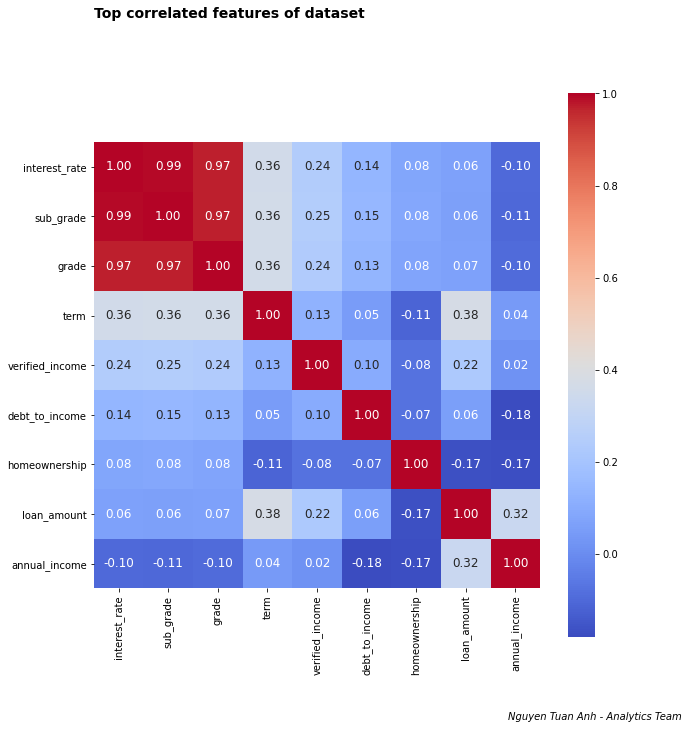

In [55]:
top = 10
corr = data.corr()
top15 = corr.nlargest(top, 'interest_rate')['interest_rate'].index
corr_top15 = data[top15].corr()

fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
# thêm title, label các trục và source:
plt.suptitle('Top correlated features of dataset', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.text(0.7, 0.01, "Nguyen Tuan Anh - Analytics Team", style='italic',transform=plt.gcf().transFigure)
plt.show()


=> Hai biến sub_grade và grade có hệ số tương quan lớn hơn so với các biến còn lại.

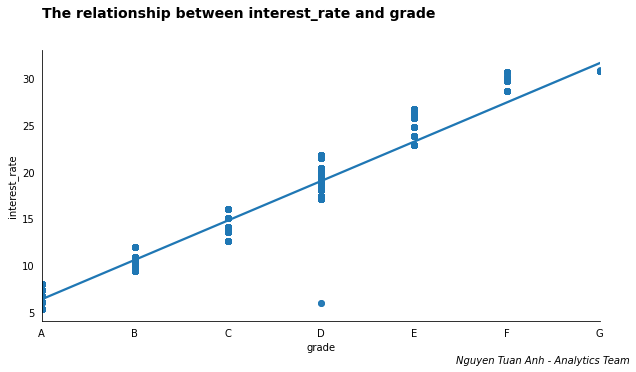

In [56]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.regplot(x=data['grade'], y=data['interest_rate'], data=data)

ax.set_xticks((0,1,2,3,4,5,6))
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E', 'F','G'))

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False)
# thêm title, label các trục và source:
plt.suptitle('The relationship between interest_rate and grade', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.text(0.7, 0.01, "Nguyen Tuan Anh - Analytics Team", style='italic',transform=plt.gcf().transFigure)
plt.show()

In [57]:
pearson_coef, p_value = stats.pearsonr(data['grade'], data['interest_rate'])
print("Hệ số tương quan giữa hai biến grade và interest_rate là", pearson_coef, "và giá trị P-value là ", p_value)

Hệ số tương quan giữa hai biến grade và interest_rate là 0.9694016378507903 và giá trị P-value là  0.0


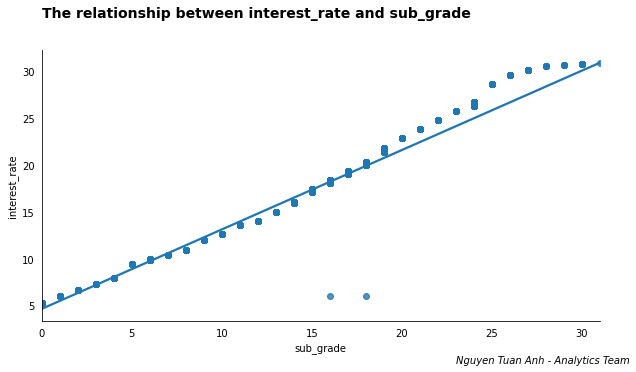

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.regplot(x=data['sub_grade'], y=data['interest_rate'], data=data)

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False)
# thêm title, label các trục và source:
plt.suptitle('The relationship between interest_rate and sub_grade', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.text(0.7, 0.01, "Nguyen Tuan Anh - Analytics Team", style='italic',transform=plt.gcf().transFigure)
plt.show()

In [59]:
pearson_coef, p_value = stats.pearsonr(data['sub_grade'], data['interest_rate'])
print("CHệ số tương quan giữa hai biến sub_grade và interest_rate là", pearson_coef, "và giá trị P-value là ", p_value)

CHệ số tương quan giữa hai biến sub_grade và interest_rate là 0.992920559907261 và giá trị P-value là  0.0


# Xây dựng mô hình Linear Regression

In [60]:
#import thư viện
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [61]:
X = data[['grade','sub_grade']]
y = data['interest_rate']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [63]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = lin_reg.predict(X_test)

In [65]:
y_pred

array([20.63241294, 11.34694449,  7.08657024, ...,  9.05278471,
        6.32185031, 13.31315897])

In [66]:
intercept = lin_reg.intercept_

print(intercept)

4.792410451963236


In [67]:
slopes = lin_reg.coef_

print(slopes)

[0.43677462 0.76471993]


Mô hình dự đoán:
 interest_rate = 4.7924 + 0.4368 grade + 0.7647 sub_grade

In [68]:
print('The full R-square is : ' +str((lin_reg.score(X,y)*100).round(5)) + '%')
print('The train R-square is : ' +str((lin_reg.score(X_train, y_train)*100).round(5)) + '%')
print('The test R-square is : ' +str((lin_reg.score(X_test, y_test)*100).round(5)) + '%')

The full R-square is : 98.65013%
The train R-square is : 98.60605%
The test R-square is : 98.82589%


=> khoảng 98% Interest_rate có thể dựa đoán dựa vào mô hình

In [69]:
#Find MSE , MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print('The MSE of interest_rate and predicted value is : ',mse.round(3))
print('The MAE of interest_rate and predicted value is : ',mae.round(3))

The MSE of interest_rate and predicted value is :  0.294
The MAE of interest_rate and predicted value is :  0.426


## Xây dựng mô hình Polynomial Regression 

In [70]:
## import thư viện
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
dataset = data.loc[:,['interest_rate','sub_grade']]

In [72]:
dataset

,interest_rate,sub_grade
0,14.07,12
1,12.61,10
2,17.09,15
3,6.72,2
4,14.07,12
...,...,...
9995,7.35,3
9996,19.03,17
9997,23.88,21
9998,5.32,0


In [73]:
X = np.array(dataset['sub_grade']).reshape(-1,1)
y = np.array(dataset['interest_rate']).reshape(-1,1)

In [74]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [75]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

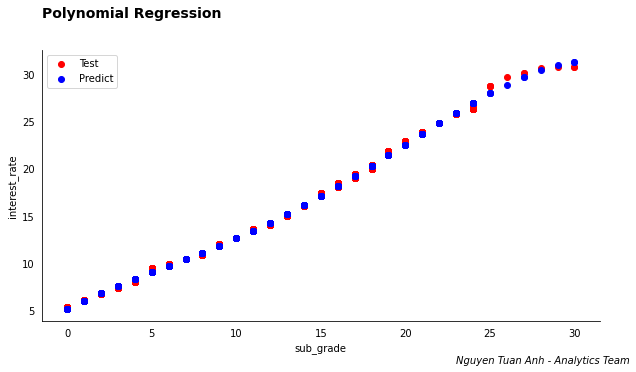

In [76]:
# Visualizing the Polymonial Regression results
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X_test, y_test, color='red', label='Test')
ax.scatter(X_test, pol_reg.predict(poly_reg.fit_transform(X_test)), color='blue', label='Predict')
plt.xlabel('sub_grade')
plt.ylabel('interest_rate')

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False)

ax.legend()
# thêm title, label các trục và source:
plt.suptitle('Polynomial Regression', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.text(0.7, 0.01, "Nguyen Tuan Anh - Analytics Team", style='italic',transform=plt.gcf().transFigure)
plt.show()

In [77]:
print('The full R-square is : ' +str((r2_score(y, pol_reg.predict(poly_reg.fit_transform(X)))*100).round(5)) + '%')
print('The train R-square is : ' +str((r2_score(y_train, pol_reg.predict(poly_reg.fit_transform(X_train)))*100).round(5)) + '%')
print('The test R-square is : ' +str((r2_score(y_test, pol_reg.predict(poly_reg.fit_transform(X_test)))*100).round(5)) + '%')

The full R-square is : 99.66587%
The train R-square is : 99.63015%
The test R-square is : 99.80847%


=> => khoảng 99% Interest_rate có thể dựa đoán dựa vào mô hình

In [78]:
#Find MSE , MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pol_reg.predict(poly_reg.fit_transform(X_test)))
mae = mean_absolute_error(y_test, pol_reg.predict(poly_reg.fit_transform(X_test)))
print('The MSE of interest_rate and predicted value is : ',mse.round(5))
print('The MAE of interest_rate and predicted value is : ',mae.round(5))

The MSE of interest_rate and predicted value is :  0.04797
The MAE of interest_rate and predicted value is :  0.17857
